<a href="https://colab.research.google.com/github/KaiJungWu/RCA/blob/main/RCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#read file
with open("/wine.data", "r") as f1,open ('/wine.names',"r") as f2,open("/Index","r") as f3:
    data = f1.read()
    name= f2.read()
    index=f3.read()
    #print(data)
    print(name)
    print(index)
type(data)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

str

In [26]:
#transformat
import pandas as pd

# import the StrinIO function
# from io module
from io import StringIO


# wrap the string data in StringIO function
StringData = StringIO(data)

# let's read the data using the Pandas
# read_csv() function#
colnames=['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash',  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = pd.read_csv(StringData, sep =",",names=colnames)

# Print the dataframe
#rint(df)

print(df.describe())
print(df.shape)

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [45]:
y_train=pd.read_csv('/content/dd/y_train.txt')
x_train=pd.read_csv('/content/dd/X_train.txt',sep='\s+',header=None)
name=pd.read_csv('/content/dd/subject_train.txt')
print(name)


#type(x_train)
print(x_train.shape)
#Transfor class label to one-hot econder

#target_mapping = {"setosa": 0,
#                  "versicolor": 1,
#                  "virginica": 2}
#Y = df["target"].map(target_mapping)

       1
0      1
1      1
2      1
3      1
4      1
...   ..
7346  30
7347  30
7348  30
7349  30
7350  30

[7351 rows x 1 columns]
(7352, 561)


In [52]:
df_501=pd.read_csv('/content/dd/501.csv')
#print(df_501)
df_501_new = df_501.sample(frac=0.10)
print(df_501_new)
data = pd.DataFrame()
df_merged = pd.concat([data, df_501_new], ignore_index=True, sort=False)
print(df_merged.shape[0])

                     timestamp    back_x    back_y    back_z   thigh_x  \
54757  2021-03-24 15:00:41.099 -1.114502 -0.272705 -0.336914 -1.048340   
4048   2021-03-24 14:43:24.799 -0.937256 -0.125000 -0.171875 -0.984375   
43738  2021-03-24 14:57:00.720 -0.671143 -0.303467 -0.197998 -1.213867   
46477  2021-03-24 14:57:55.500 -1.015137 -0.108887 -0.203125 -0.988037   
89893  2021-03-24 15:12:23.819 -1.156250 -0.239502 -0.521973 -1.318359   
...                        ...       ...       ...       ...       ...   
76924  2021-03-24 15:08:04.440 -0.948975 -0.091797 -0.268066 -1.042480   
65219  2021-03-24 15:04:10.340 -0.998047 -0.082764  0.202881 -1.033691   
12904  2021-03-24 14:46:25.119 -0.832031 -0.059082 -0.337402 -1.187012   
30628  2021-03-24 14:52:38.520 -1.019287 -0.125000 -0.093750 -0.968750   
85881  2021-03-24 15:11:03.579 -1.049805 -0.014404  0.008545 -1.260498   

        thigh_y   thigh_z  label  
54757 -0.341064 -0.078613      1  
4048  -0.090332 -0.098877      6  
43738 

In [54]:
def training_set(name,null_df,df_merged):
  raw_data=pd.read_csv(f'/content/dd/{name}.csv')
  raw_data_sample=raw_data.sample(frac=0.025)
  print(raw_data_sample.shape)

  df_merge=pd.concat([null_df,raw_data_sample],ignore_index=True,sort=False)
  print(df_merge.shape[0])
  return df_merged




(2596, 8)
2596
(3284, 8)
3284
(2910, 8)
2910
(3052, 8)
3052


In [59]:
name=['501','502','503','510']
training_set=pd.DataFrame()
testing_set=pd.DataFrame()

for i in name:
  raw_data=pd.read_csv(f'/content/dd/{i}.csv')
  split = StratifiedShuffleSplit(n_splits = 5, random_state = 42, test_size=0.002, train_size=0.008)
  #raw_data_sample=raw_data.sample(frac=0.025)
  print(raw_data_sample.shape)
  for train_index, test_index in split.split(train, train["label"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]
  if name.index(i)==0:
    df_merge=pd.concat([null_df,raw_data_sample],ignore_index=True,sort=False)
  else :
    df_merge=pd.concat([df_merge,raw_data_sample],ignore_index=True,sort=False)
  print(df_merge.shape[0])


(2596, 8)
2596
(3284, 8)
5880
(2910, 8)
8790
(3052, 8)
11842


                     timestamp    back_x    back_y    back_z   thigh_x  \
33418  2021-03-24 14:53:34.319 -1.000000  0.017090 -0.120605 -0.951904   
38326  2021-03-24 14:55:12.479 -0.999756 -0.296143 -0.187500 -0.975342   
78237  2021-03-24 15:08:30.700 -0.671875 -0.012451 -0.259277 -0.972412   
93051  2021-03-24 15:13:26.979 -0.793701  0.039062  0.045166 -1.139404   
12992  2021-03-24 14:46:26.880 -0.981934 -0.218750 -0.190674 -0.760254   
...                        ...       ...       ...       ...       ...   
63493  2021-03-24 15:03:35.819 -0.869873 -0.105469  0.088867 -0.099365   
80051  2021-03-24 15:09:06.980 -0.881104 -0.096924 -0.199463 -1.080811   
98158  2021-03-24 15:15:10.119 -0.828613 -0.109131  0.500488 -0.232910   
94033  2021-03-24 15:13:46.619 -1.321289  0.129150 -0.320312 -1.309814   
23206  2021-03-24 14:49:54.319 -0.140625 -0.004395  0.906250 -0.133301   

        thigh_y   thigh_z  label  
33418 -0.048584  0.156982      6  
38326 -0.105225 -0.272217      1  
78237 

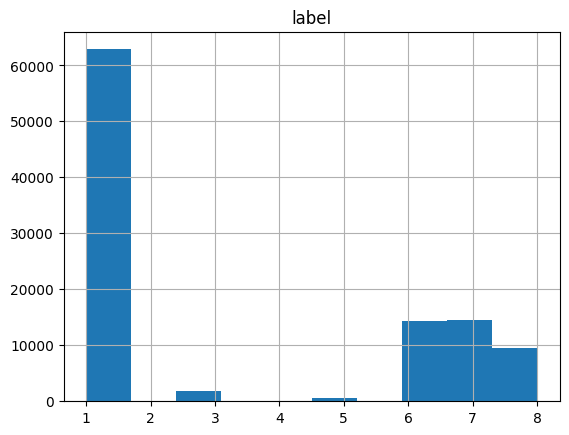

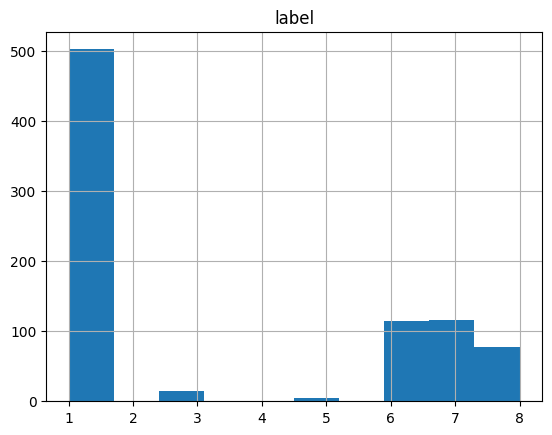

(830, 8)


In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
def stratified_sampling(df):

  #train=pd.read_csv('/content/dd/501.csv')
  split = StratifiedShuffleSplit(n_splits = 5, random_state = 42, test_size=0.002, train_size=0.008)
  #每個分組都取20%放入測試集

  for train_index, test_index in split.split(train, train["label"]):
      strat_train_set = train.loc[train_index]
      strat_test_set = train.loc[test_index]
  return train,test
  print(strat_train_set)
  train["label"].hist()
plt.title("label")
plt.show()
strat_train_set["label"].hist()
plt.title("label")
plt.show()
print(strat_train_set.shape)